# Import, Summary, Date Preperation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Year          6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Day           6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


In [4]:
df.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01
Year,6435.0,2.010965e+03,0.797019,2010.000,2010.000,2011.000000,2.012000e+03,2.012000e+03
Month,6435.0,6.447552e+00,3.238308,1.000,4.000,6.000000,9.000000e+00,1.200000e+01
Day,6435.0,1.567832e+01,8.755780,1.000,8.000,16.000000,2.300000e+01,3.100000e+01


# Correlation Analysis and Visualization

In [7]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,3.474318e-12,2.910676e-15,1.478526e-15
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.837754e-02,7.614332e-02,-1.740946e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-5.678257e-02,1.229958e-01,4.452608e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,6.426923e-02,2.358618e-01,2.697332e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,7.794703e-01,-4.215590e-02,2.807253e-02
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,7.479573e-02,4.979672e-03,2.684300e-03
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-2.418135e-01,-1.274559e-02,-4.233293e-03
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,1.000000e+00,-1.944645e-01,6.405867e-03
Month,2.910676e-15,0.076143,1.229958e-01,0.235862,-0.042156,0.004980,-0.012746,-1.944645e-01,1.000000e+00,1.519184e-02
Day,1.478526e-15,-0.017409,4.452608e-02,0.026973,0.028073,0.002684,-0.004233,6.405867e-03,1.519184e-02,1.000000e+00


<Axes: >

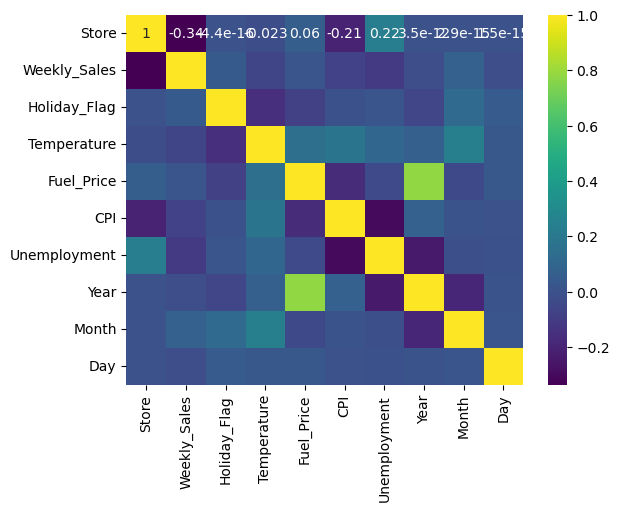

In [8]:
sns.heatmap(data=df.corr(), annot=True, cmap="viridis")

<Axes: xlabel='Year', ylabel='Fuel_Price'>

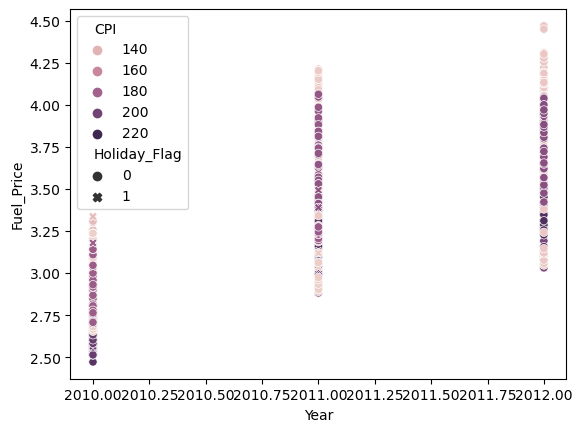

In [19]:
sns.scatterplot(data=df, x=df['Year'], y=df['Fuel_Price'], hue=df['CPI'], style=df['Holiday_Flag'])

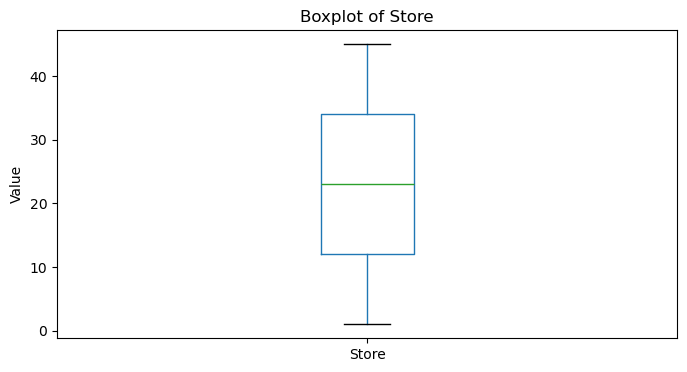

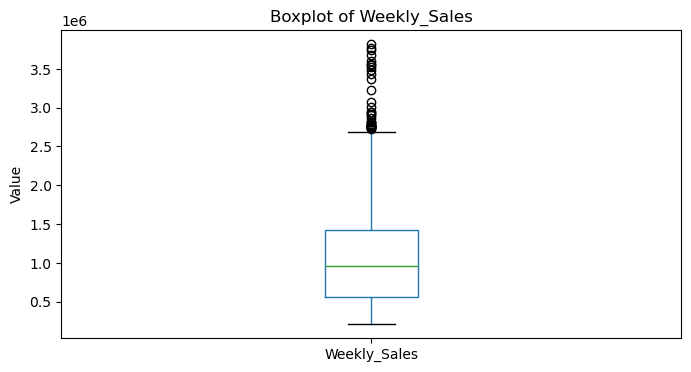

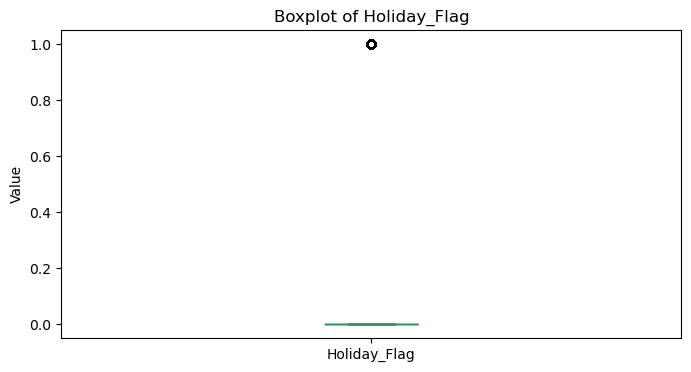

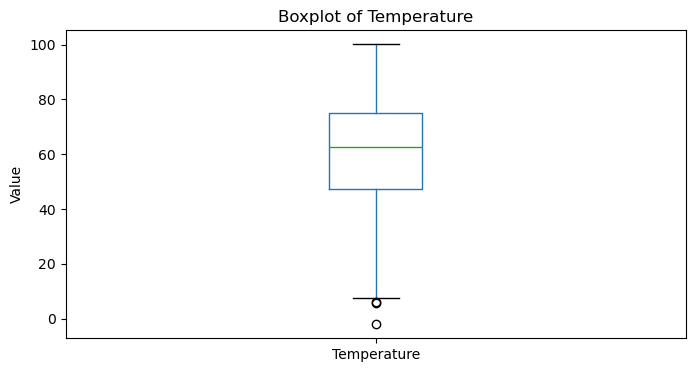

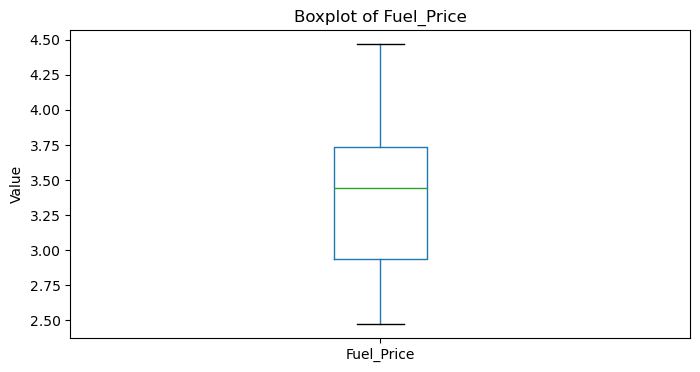

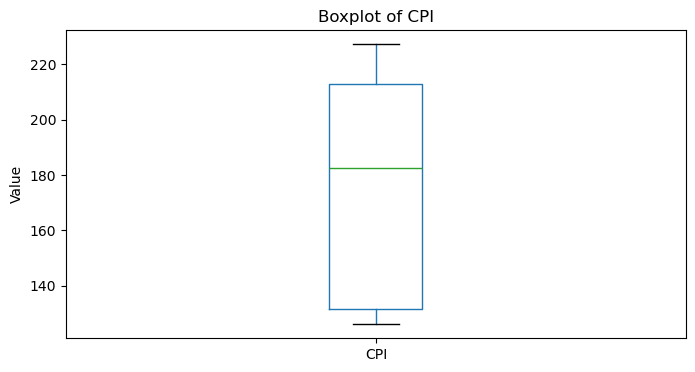

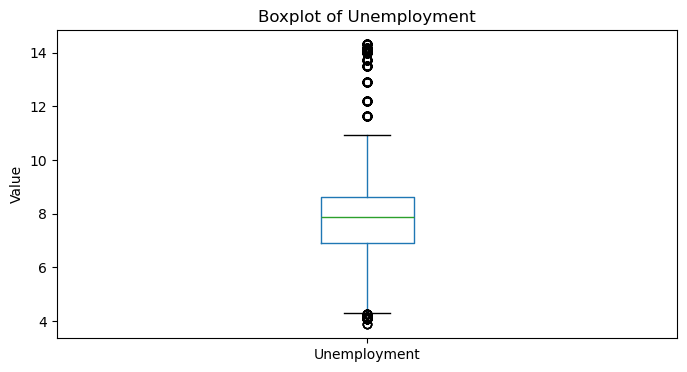

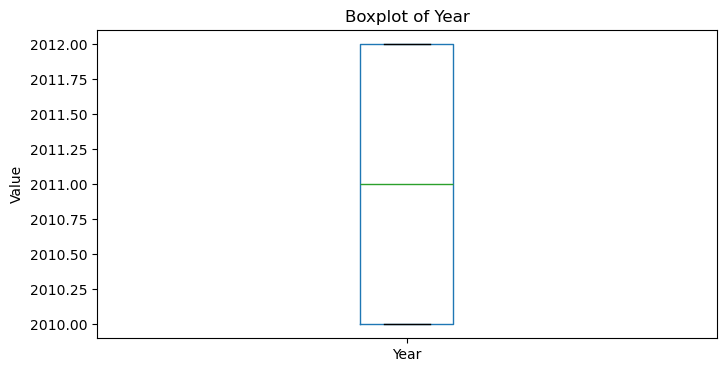

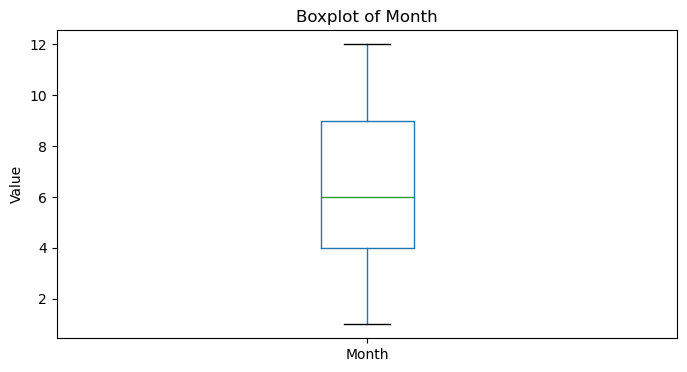

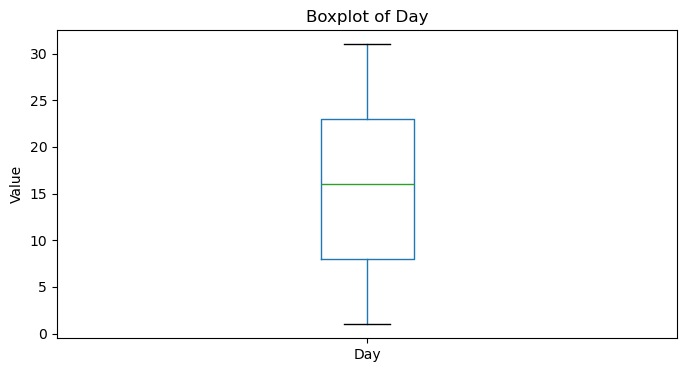

In [10]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Value')
    plt.grid(False)
    plt.show()

# Training the Model and Evaluation

In [11]:
X = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_scaled, y)

LassoCV(cv=5, random_state=42)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lasso_cv.fit(X_train, y_train)

predictions = lasso_cv.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 432634.50039488636
R-squared: 0.15539005308500997


<Axes: >

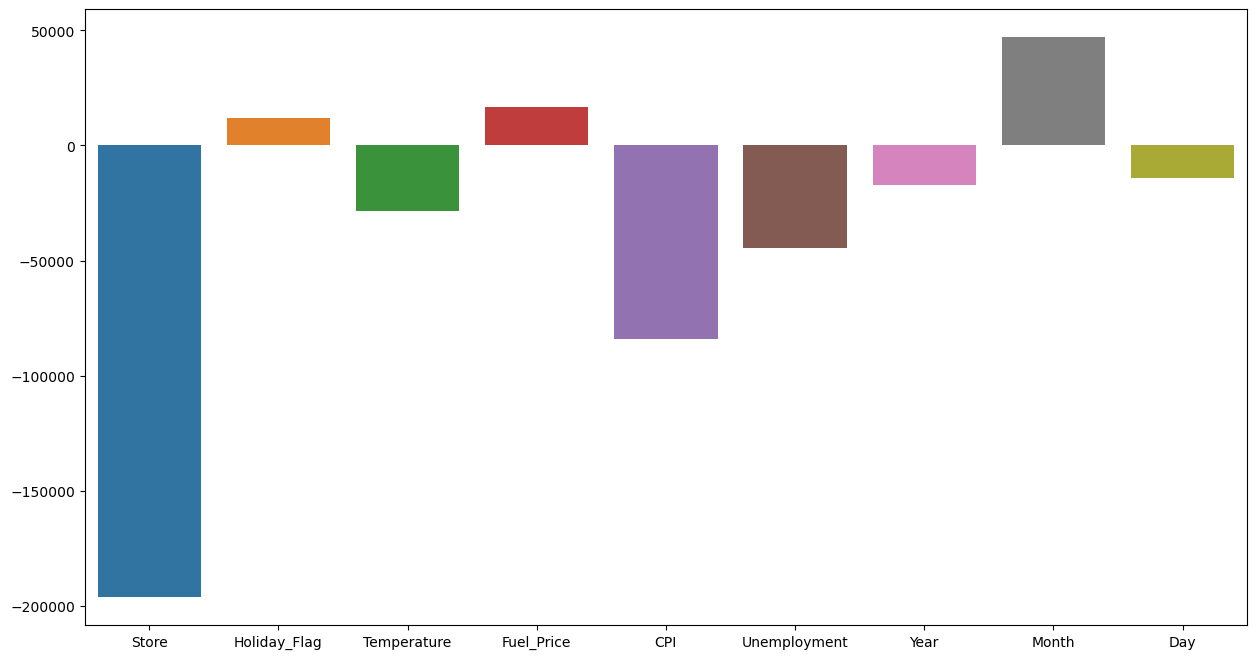

In [15]:
coef = pd.Series(lasso_cv.coef_, index=X.columns)

plt.figure(figsize=(15,8))
sns.barplot(x = coef.index, y = coef.values, )

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

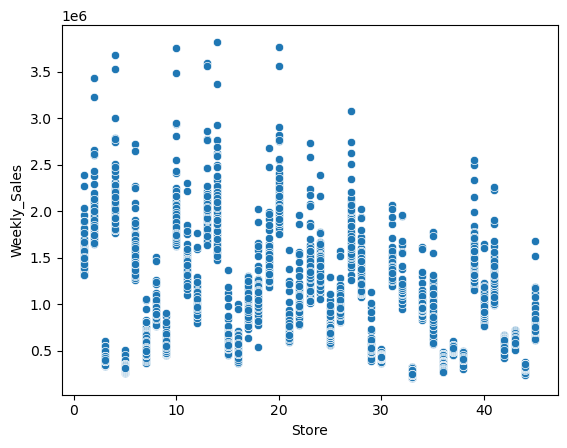

In [16]:
sns.scatterplot(x = df['Store'], y = df['Weekly_Sales'])